C:\Users\Almazt\AppData\Local\Temp\ipykernel_17508\4138530325.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_handsets = pd.read_sql_query(query, connection)
C:\Users\Almazt\AppData\Local\Temp\ipykernel_17508\4138530325.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  durations = pd.read_sql_query("SELECT duration FROM xdr_data ORDER BY duration;", connection)


            duration
0       7.142988e+06
1       7.146574e+06
2       7.189000e+06
3       7.212645e+06
4       7.258080e+06
...              ...
149996  1.772931e+09
149997  1.823653e+09
149998  1.859328e+09
149999  1.859336e+09
150000           NaN

[150001 rows x 1 columns]


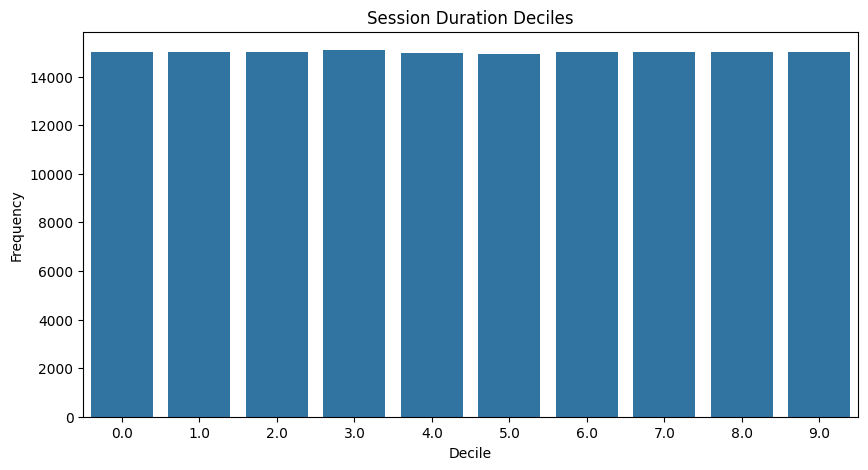

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database connection
# Connect to psycopg2 database (or create it if it doesn't exist)
from sqlalchemy import create_engine

connection = psycopg2.connect("dbname=Teleco user=postgres password=Leul@123")

# Create a cursor object to interact with the database
cursor = connection.cursor()

# Decile Plot for Session Duration Segmentation
# Decile Analysis
query = """SELECT duration
FROM xdr_data
ORDER BY duration;"""

df_handsets = pd.read_sql_query(query, connection)
print(df_handsets)

# Python Decile Calculation:

durations = pd.read_sql_query("SELECT duration FROM xdr_data ORDER BY duration;", connection)
durations['decile'] = pd.qcut(durations['duration'], 10, labels=False)
decile_counts = durations['decile'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=decile_counts.index, y=decile_counts.values)
plt.title('Session Duration Deciles')
plt.xlabel('Decile')
plt.ylabel('Frequency')
plt.show()

